In [23]:
# Load necessary libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [24]:
# Read in data files 
# Stock return data
url = "https://github.com/llorracc/as.180.369/blob/python-demo/materials/demo/data/ie_data.csv?raw=true"
df_returns = pd.read_csv(url)
print(df_returns.head(5))

# GOP term flags
url = "https://github.com/llorracc/as.180.369/blob/python-demo/materials/demo/data/GOP_flag.csv?raw=true"
df_gop = pd.read_csv(url)
print(df_gop.head(5))

      Date  P_nom  D_nom  E_nom        CPI  Date_Fraction  LIR_GS10  \
0  1871.01   4.44   0.26    0.4  12.464061    1871.041667  5.320000   
1  1871.02   4.50   0.26    0.4  12.844641    1871.125000  5.323333   
2  1871.03   4.61   0.26    0.4  13.034972    1871.208333  5.326667   
3  1871.04   4.74   0.26    0.4  12.559226    1871.291667  5.330000   
4  1871.05   4.86   0.26    0.4  12.273812    1871.375000  5.333333   

       P_real    D_real    TRP_real    E_real   TRE_real  CAPE  
0  108.541509  6.356034  108.541509  9.772385   9.772385   NaN  
1  106.748796  6.167708  107.262772  9.488782   9.534469   NaN  
2  107.761414  6.077650  108.789174  9.350231   9.439408   NaN  
3  114.997369  6.307873  116.624811  9.704419   9.841756   NaN  
4  120.650541  6.454556  122.903478  9.930086  10.115513   NaN  
      Date  GOP
0  1871.01    1
1  1871.02    1
2  1871.03    1
3  1871.04    1
4  1871.05    1


In [25]:
# Create new data frame that merges GOP flag with returns data
df = pd.merge(df_returns, df_gop, left_on='Date', right_on='Date')
#print(df.head(5))

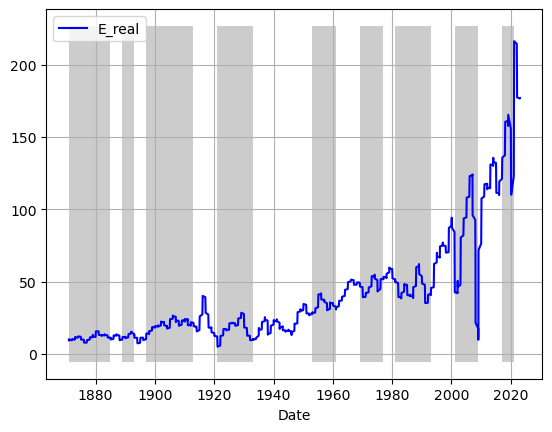

In [26]:
# Plot real earnings over time. Shade GOP presidential terms
# convenience function
def plot_series(ax, df, index='Date', cols=['E_real'], area='GOP'):
    # convert area variable to boolean
    df[area] = df[area].astype(int).astype(bool)
    # set up an index based on date
    df = df.set_index(keys=index, drop=False)
    # line plot
    df.plot(ax=ax, x=index, y=cols, color='blue')
    # extract limits
    y1, y2 = ax.get_ylim()
    ax.fill_between(df[index].index, y1=y1, y2=y2, where=df[area], facecolor='grey', alpha=0.4)
    return ax

# set up figure, axis
f, ax = plt.subplots()
plot_series(ax, df)
ax.grid(True)
plt.show()


In [35]:
# Run OLS regression of Monthly earnings onto GOP president flag
# Outcome real earnings next period. GOP president is pre-determined. 
df['GOPlag'] = df['GOP'].shift()

sm.formula.ols(formula = 'E_real ~ GOPlag', data=df).fit()
# printing the summary table
print(sm.formulasummary())

AttributeError: 'function' object has no attribute 'summary'